# Predicciones Meteorol√≥gicas (AEMET) - SPRINT I

Parte 4 - Exploratory Data Analysis


Mapa Coropl√©tico: Mostrar en un mapa coropl√©tico (choropleth map) las
temperaturas por provincia, filtradas por d√≠as, mes y a√±o.

Comparador: Usando un gr√°fico de l√≠neas, comparar 2 a√±os de una misma
provincia, mostrar en la misma gr√°fica: media, mediana, min y m√°x, para cada a√±o.

Outliers: Mostrar los valores de temperatura de un a√±o usando un histograma,
diferenciando los valores at√≠picos para ese a√±o. Para calcular los outliers se puede
usar el Z-Score, Tukey‚Äôs Fence o DBSCAN.

Definir y a√±adir 2 gr√°ficos m√°s.

Rango de colores fijo: vmin = -10.8¬∞C, vmax = 36.4¬∞C


/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]


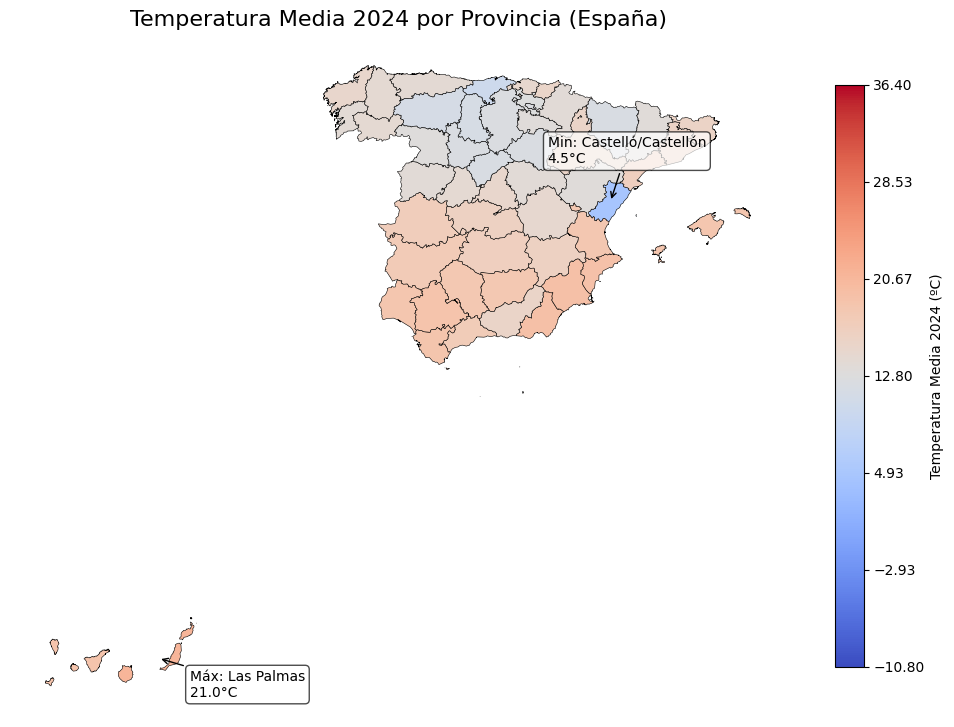

/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]


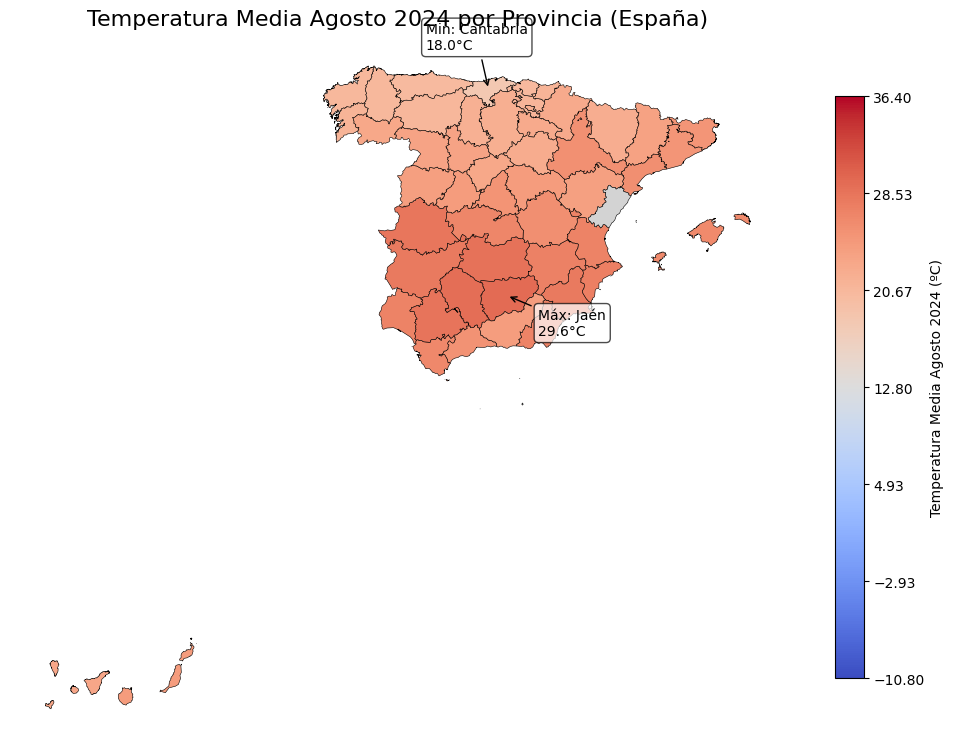

/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]


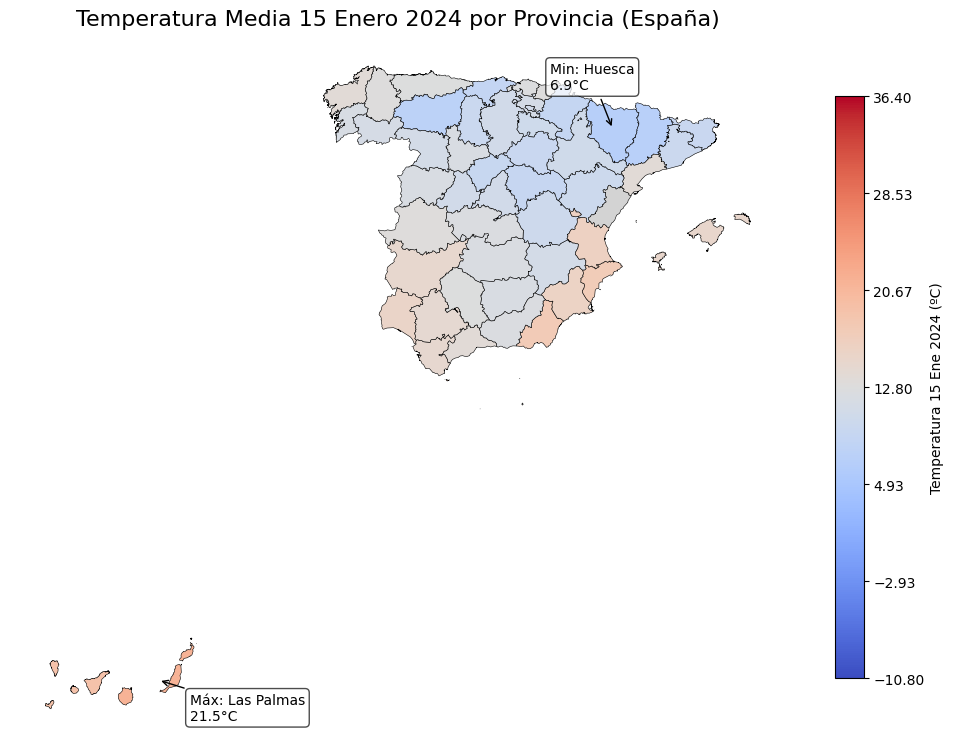

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) CARGAMOS DATOS Y GEOJSON DE PROVINCIAS
df = pd.read_csv('data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df['provincia'] = df['provincia'].str.strip().str.title()

gdf = gpd.read_file('data/spain-provinces.geojson')
gdf['provincia'] = gdf['name'].str.strip().str.title()

# 2) RANGO FIJO PARA 2024
df_2024 = df[df['fecha'].dt.year == 2024].copy()
vmin = df_2024['tmed'].min()
vmax = df_2024['tmed'].max()
print(f"Rango de colores fijo: vmin = {vmin:.1f}¬∞C, vmax = {vmax:.1f}¬∞C")

# 3) FUNCI√ìN PARA DIBUJAR CADA COROPL√âTICO
def dibujar_coropletico(datos, nombre_columna, texto_titulo, etiqueta_leyenda):
    gdf_unido = gdf.merge(datos, on='provincia', how='left')
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_unido.plot(
        column=nombre_columna,
        cmap='coolwarm',
        vmin=vmin, vmax=vmax,
        legend=True,
        edgecolor='black', linewidth=0.4,
        ax=ax,
        legend_kwds={
            'label': etiqueta_leyenda,
            'shrink': 0.6,
            'ticks': np.linspace(vmin, vmax, 7)
        },
        missing_kwds={
            'color': 'lightgrey',
            'label': 'Sin datos'
        }
    )
    ax.set_title(texto_titulo, fontsize=16)
    ax.axis('off')

    # Anotamos m√°ximo y m√≠nimo si existen
    if datos[nombre_columna].notna().any():
        # M√°ximo
        idx_max = datos[nombre_columna].idxmax()
        prov_max = datos.loc[idx_max, 'provincia']
        val_max = datos.loc[idx_max, nombre_columna]
        cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
        ax.annotate(f"M√°x: {prov_max}\n{val_max:.1f}¬∞C",
                    xy=(cmax.x, cmax.y), xytext=(cmax.x+1, cmax.y-1),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
                    fontsize=10)

        # M√≠nimo
        idx_min = datos[nombre_columna].idxmin()
        prov_min = datos.loc[idx_min, 'provincia']
        val_min = datos.loc[idx_min, nombre_columna]
        cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]
        ax.annotate(f"Min: {prov_min}\n{val_min:.1f}¬∞C",
                    xy=(cmin.x, cmin.y), xytext=(cmin.x-2, cmin.y+1),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
                    fontsize=10)

    # Flecha ‚ÄúSin datos‚Äù sobre Castell√≥n si falta
    sin_datos = gdf_unido[gdf_unido[nombre_columna].isna()]
    if 'Castell√≥n' in sin_datos['provincia'].values:
        fila = sin_datos[sin_datos['provincia']=='Castell√≥n'].iloc[0]
        centroide = fila.geometry.centroid
        ax.annotate("Sin datos",
                    xy=(centroide.x, centroide.y),
                    xytext=(centroide.x+1, centroide.y-1),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
                    fontsize=10)

    plt.tight_layout()
    plt.show()


# 4A) MAPA A: Temperatura Media ANUAL 2024
tmed_anual = (
    df_2024
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
)
dibujar_coropletico(
    datos=tmed_anual,
    nombre_columna='tmed',
    texto_titulo='Temperatura Media 2024 por Provincia (Espa√±a)',
    etiqueta_leyenda='Temperatura Media 2024 (¬∫C)'
)


# 4B) MAPA B: Temperatura Media Agosto 2024
tmed_agosto = (
    df_2024[df_2024['fecha'].dt.month == 8]
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
)
dibujar_coropletico(
    datos=tmed_agosto,
    nombre_columna='tmed',
    texto_titulo='Temperatura Media Agosto 2024 por Provincia (Espa√±a)',
    etiqueta_leyenda='Temperatura Media Agosto 2024 (¬∫C)'
)


# 4C) MAPA C: Temperatura Media 15 Enero 2024
fecha_fija = pd.to_datetime('2024-01-15')
tmed_dia = (
    df[df['fecha'] == fecha_fija]
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
)
dibujar_coropletico(
    datos=tmed_dia,
    nombre_columna='tmed',
    texto_titulo='Temperatura Media 15 Enero 2024 por Provincia (Espa√±a)',
    etiqueta_leyenda='Temperatura 15 Ene 2024 (¬∫C)'
)


Mapa 1: Temperatura Media 2024 por Provincia (Espa√±a)


Cada provincia aparece coloreada seg√∫n su temperatura media diaria a lo largo de todo 2024 (se suman las 365 tmed y se divide entre 365).

Colores beige-rosados: la mayor√≠a del centro y sur (medias entre 12 ¬∞C y 20 ¬∞C).

Azul claro (‚âà 10‚Äì12 ¬∞C): provincias del norte (Cantabria, Asturias, Le√≥n‚Ä¶).

Azul m√°s intenso (‚âà 4‚Äì6 ¬∞C): Castell√≥n fue la m√°s fr√≠a (4.5 ¬∞C de media).

Rojos (‚â• 20 ¬∞C): Andaluc√≠a y Canarias, donde las medias superaron 20 ¬∞C; Las Palmas fue la m√°s c√°lida (‚âà 21 ¬∞C).


Este mapa no cuenta d√≠as fr√≠os o c√°lidos, sino la temperatura promedio anual de cada provincia. Castell√≥n qued√≥ de las m√°s bajas (‚âà 4.5 ¬∞C), y Las Palmas de las m√°s altas (‚âà 21 ¬∞C).

Mapa 2: Temperatura Media Agosto 2024 por Provincia (Espa√±a)

La temperatura media diaria de cada provincia durante todo agosto de 2024 (se suman las tmed de los 31 d√≠as y se divide entre 31).


Anaranjados intensos (‚âà 29‚Äì30 ¬∞C): Ja√©n, C√≥rdoba, Badajoz y Ciudad Real, en pleno coraz√≥n de Andaluc√≠a, fueron las provincias m√°s calurosas.

Beige-rosado (‚âà 24‚Äì26 ¬∞C): La mayor parte del centro y norte peninsular, donde agosto rond√≥ los 25 ¬∞C de media.

Azul claro (‚âà 18 ¬∞C): Cantabria fue la m√°s fresca ese mes, con una media alrededor de 18 ¬∞C, lo que refleja que el norte sufri√≥ unas condiciones muy suaves.

Rojo oscuro: Ja√©n se lleva el premio a la media m√°s alta (‚âà 29.6 ¬∞C).


En agosto de 2024, las provincias de Ja√©n, C√≥rdoba, Badajoz y Ciudad Real estuvieron rozando los 30 ¬∞C de media, mientras que Cantabria se qued√≥ en torno a 18 ¬∞C. Este mapa es la ‚Äòfoto‚Äô exclusiva de aquel mes, no del a√±o completo.

Mapa 3: Temperatura Media 15 de Enero 2024 por Provincia (Espa√±a)

La temperatura media de un solo d√≠a (15 de enero de 2024) en cada provincia, calculada a partir de la tmed de ese d√≠a.


Azul intenso (‚âà 6‚Äì8 ¬∞C): provincias del norte y centro (Huesca, Le√≥n, Burgos), donde hizo m√°s fr√≠o; Huesca fue la m√°s baja con ~6.9 ¬∞C.

Beige-rosado (‚âà 10‚Äì14 ¬∞C): la mayor parte de la pen√≠nsula, clima fresco pero no extremo.

Rosado suave (‚âà 15 ¬∞C): sur de Espa√±a (Sevilla, M√°laga), donde estuvo m√°s suave.

Rojo claro (‚âà 21 ¬∞C): Canarias, con temperaturas muy templadas (Las Palmas alcanz√≥ ~21.5 ¬∞C).


El 15 de enero de 2024, Huesca fue la m√°s fr√≠a (~6.9 ¬∞C) y Las Palmas la m√°s templada (~21.5 ¬∞C).

Resumen:
Mapa anual 2024: colorea cada provincia seg√∫n su temperatura media de todo el a√±o. ‚ÄúMin: Castell√≥n 4.5 ¬∞C‚Äù significa que la media anual m√°s baja se dio en Castell√≥n, y ‚ÄúM√°x: Las Palmas 21.0 ¬∞C‚Äù que la media anual m√°s alta fue en Las Palmas.

Mapa agosto 2024: colorea cada provincia seg√∫n su media en agosto. ‚ÄúMin: Cantabria 18.0 ¬∞C‚Äù muestra la provincia m√°s fresca ese mes, y ‚ÄúM√°x: Ja√©n 29.6 ¬∞C‚Äù la m√°s calurosa.

Mapa 15 de enero 2024: colorea cada provincia seg√∫n su media en ese d√≠a espec√≠fico. ‚ÄúMin: Huesca 6.9 ¬∞C‚Äù indica que Huesca fue la m√°s fr√≠a, y ‚ÄúM√°x: Las Palmas 21.5 ¬∞C‚Äù la m√°s templada.

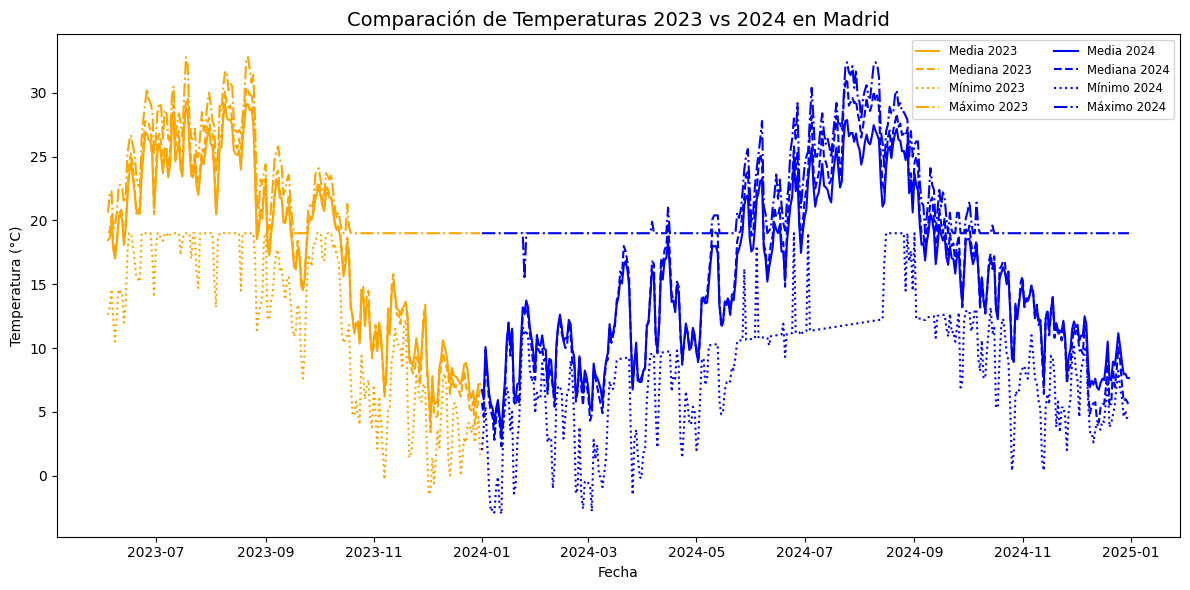

In [13]:
# 3) COMPARADOR DE TEMPERATURAS PARA MADRID (2023 vs 2024)

# Elegimos la provincia y filtramos nuestros datos
provincia = 'Madrid'
df_madrid = df[df['provincia'] == provincia].copy()

# Agrupo por fecha y calculamos media, mediana, m√≠nimo y m√°ximo de cada d√≠a
estadisticas = (
    df_madrid
    .groupby('fecha')['tmed']
    .agg(['mean', 'median', 'min', 'max'])
    .reset_index()
)
# Renombramos las columnas
estadisticas.columns = ['fecha', 'media_dia', 'mediana_dia', 'min_dia', 'max_dia']

# Separamos el DataFrame en 2023 y en 2024
estad_2023 = estadisticas[estadisticas['fecha'].dt.year == 2023]
estad_2024 = estadisticas[estadisticas['fecha'].dt.year == 2024]

# Dibujamos las l√≠neas (comparando los dos a√±os)
plt.figure(figsize=(12, 6))

# A√±o 2023 en naranja
plt.plot(estad_2023['fecha'], estad_2023['media_dia'],   label='Media 2023',  color='orange')
plt.plot(estad_2023['fecha'], estad_2023['mediana_dia'], label='Mediana 2023', linestyle='--', color='orange')
plt.plot(estad_2023['fecha'], estad_2023['min_dia'],     label='M√≠nimo 2023',   linestyle=':',  color='orange')
plt.plot(estad_2023['fecha'], estad_2023['max_dia'],     label='M√°ximo 2023',   linestyle='-.', color='orange')

# A√±o 2024 azul
plt.plot(estad_2024['fecha'], estad_2024['media_dia'],   label='Media 2024',  color='blue')
plt.plot(estad_2024['fecha'], estad_2024['mediana_dia'], label='Mediana 2024', linestyle='--', color='blue')
plt.plot(estad_2024['fecha'], estad_2024['min_dia'],     label='M√≠nimo 2024',   linestyle=':',  color='blue')
plt.plot(estad_2024['fecha'], estad_2024['max_dia'],     label='M√°ximo 2024',   linestyle='-.', color='blue')

# Ponemos t√≠tulo y etiquetas
plt.title(f'Comparaci√≥n de Temperaturas 2023 vs 2024 en {provincia}', fontsize=14)
plt.ylabel('Temperatura (¬∞C)')
plt.xlabel('Fecha')

# leyenda
plt.legend(ncol=2, fontsize='small')

plt.tight_layout()
plt.show()


Gr√°fico: Comparaci√≥n de Temperaturas 2023 vs 2024 en Madrid

En un mismo dibujo hay dos colores:

Naranja: medias, medianas, m√≠nimos y m√°ximos de cada d√≠a durante 2023 (de junio a diciembre).

Azul: lo mismo pero para 2024 (de enero a diciembre).

*Significado de las lineaas:

Media diaria (l√≠nea continua): promedio de ese d√≠a.

Mediana diaria (l√≠nea discontinua): valor central del d√≠a (muy parecido a la media).

M√≠nimo diario (l√≠nea punteada): temperatura m√°s baja de ese d√≠a.

M√°ximo diario (l√≠nea guiones-puntos): temperatura m√°s alta de ese d√≠a.

En naranja se ve todo 2023; en azul todo 2024.

*Analizo por tramos:

Verano 2023 (naranja): la media sube a unos 27‚Äì29 ¬∞C en julio-agosto. M√≠nimos de ~15 ¬∞C y m√°ximos de ~32 ¬∞C.

Oto√±o‚ÄìInvierno 2023 (naranja):

Septiembre: media ~23 ¬∞C

Octubre: media ~18 ¬∞C

Noviembre: media ~12 ¬∞C, m√≠nimas bajan a 0 ¬∞C o ‚Äì1 ¬∞C

Diciembre: media ~6‚Äì8 ¬∞C, m√≠nimas de ‚Äì2 ¬∞C, m√°ximas de 10 ¬∞C

Invierno 2024 (azul, enero‚Äìfebrero):

Enero arranca en ~7 ¬∞C y sube a ~10 ¬∞C

M√≠nimas de ‚Äì2 ¬∞C; m√°ximas de 12‚Äì15 ¬∞C

Primavera 2024 (azul, marzo‚Äìmayo):

Marzo ~12 ¬∞C de media

Abril ~16 ¬∞C

Mayo ~19‚Äì20 ¬∞C

M√≠nimas de ~6 ¬∞C, m√°ximas de ~25 ¬∞C

Verano 2024 (azul, junio‚Äìagosto):

Julio y agosto suben a ~27‚Äì28 ¬∞C de media

M√°ximos de ~32‚Äì33 ¬∞C, m√≠nimas nocturnas de ~15‚Äì17 ¬∞C

Oto√±o‚ÄìInvierno 2024 (azul, septiembre‚Äìdiciembre):

Septiembre cae de ~28 ¬∞C a ~20 ¬∞C

Octubre ronda ~15‚Äì18 ¬∞C

Noviembre baja a ~10‚Äì12 ¬∞C

Diciembre se sit√∫a en ~6‚Äì8 ¬∞C, con m√≠nimas de ‚Äì3 ¬∞C y m√°ximas de 10‚Äì12 ¬∞C

*Conclusiones:
Veranos muy parecidos: ambos a√±os alcanzan ~27‚Äì29 ¬∞C de media en julio y agosto, con m√°ximos de ~32 ¬∞C. 2024 parece mantenerse alto un poco m√°s d√≠as.

Inviernos iguales: finales de 2023 y comienzos de 2024 tienen medias de ~6‚Äì8 ¬∞C y m√≠nimas de ‚Äì2 ¬∞C o menos.

Primavera 2024 m√°s r√°pida: en marzo 2024 ya est√° en ~12 ¬∞C, mientras que en marzo 2023 estaba m√°s cerca de ~10 ¬∞C.

Oto√±os casi id√©nticos: de septiembre a noviembre ambos a√±os bajan de ~23 ¬∞C a ~12 ¬∞C de media, sin gran diferencia.

En este gr√°fico vemos en naranja lo que pas√≥ con la temperatura d√≠a a d√≠a en Madrid durante 2023 (media, mediana, m√≠nimo y m√°ximo), y en azul lo mismo para 2024. Ambos a√±os tienen veranos alrededor de 27‚Äì29 ¬∞C de media y m√°ximos de ~32 ¬∞C; inviernos cerca de 6‚Äì8 ¬∞C con m√≠nimas de ‚Äì2 ¬∞C. La primavera de 2024 subi√≥ antes que la de 2023, pero en general el patr√≥n (calor en verano y fr√≠o en invierno) es pr√°cticamente el mismo.

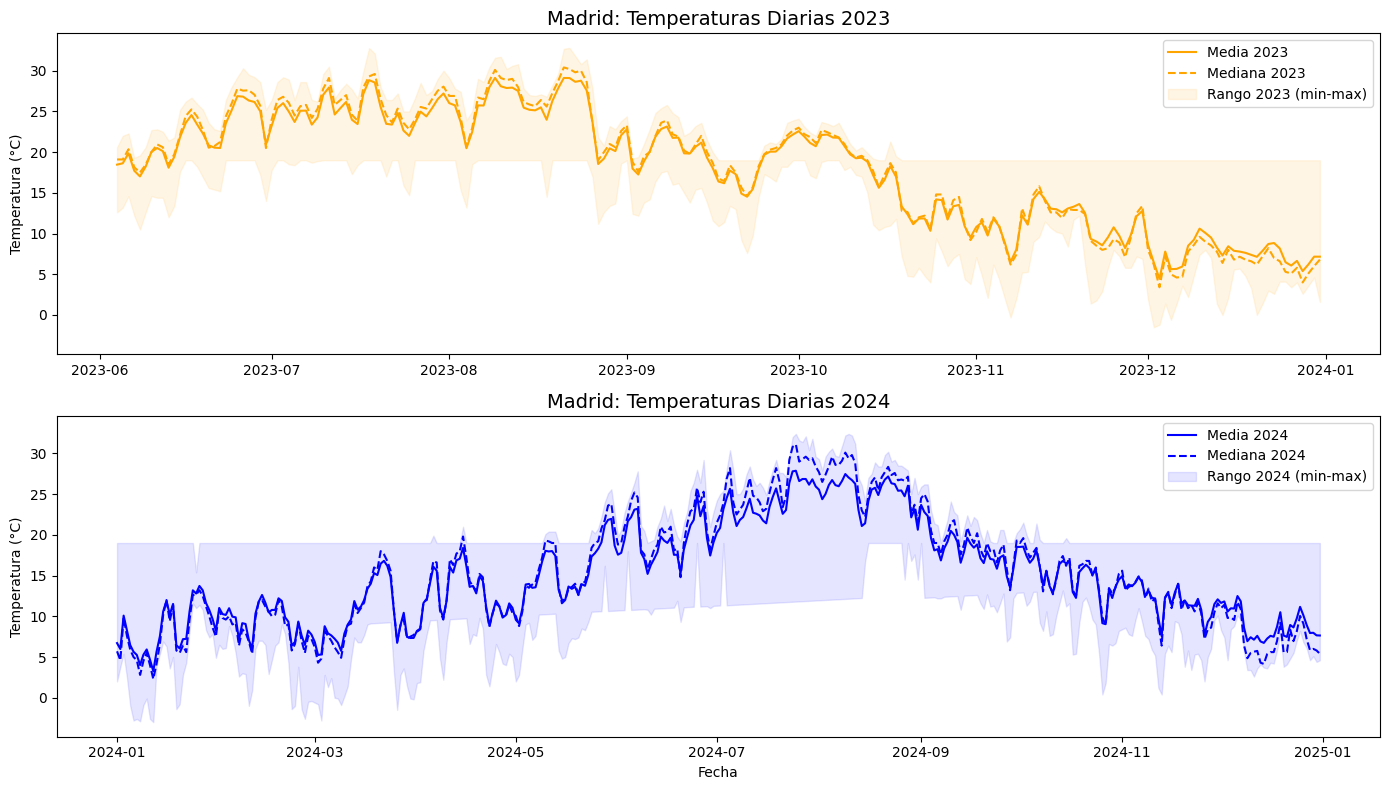

In [14]:
# COMPARADOR DE TEMPERATURAS PARA MADRID (2023 vs 2024)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
# Normalizamos el nombre de la provincia
df['provincia'] = df['provincia'].str.strip().str.title()

# Filtramos solo Madrid
df_mad = df[df['provincia'] == 'Madrid'].copy()

# Calculamos para cada fecha: media, mediana, m√≠nimo y m√°ximo de tmed
estad = (
    df_mad
    .groupby('fecha')['tmed']
    .agg(['mean', 'median', 'min', 'max'])
    .reset_index()
)

# Separamos en 2023 y en 2024
estad_2023 = estad[estad['fecha'].dt.year == 2023]
estad_2024 = estad[estad['fecha'].dt.year == 2024]

# Preparamos dos subgr√°ficos (uno para cada a√±o), con el mismo eje vertical
fig, (eje1, eje2) = plt.subplots(2, 1, figsize=(14, 8), sharey=True)

# Gr√°fico 2023
# Dibujamos la l√≠nea de la media diaria en naranja
eje1.plot(estad_2023['fecha'], estad_2023['mean'], color='orange', label='Media 2023')
# Dibujamos la l√≠nea punteada de la mediana diaria
eje1.plot(estad_2023['fecha'], estad_2023['median'], color='orange', linestyle='--', label='Mediana 2023')
# Le hago entre m√≠nimo y m√°ximo diario, transparencia
eje1.fill_between(
    estad_2023['fecha'],
    estad_2023['min'],
    estad_2023['max'],
    color='orange', alpha=0.1,
    label='Rango 2023 (min-max)'
)
eje1.set_title('Madrid: Temperaturas Diarias 2023', fontsize=14)
eje1.set_ylabel('Temperatura (¬∞C)')
eje1.legend()

# Gr√°fico 2024
eje2.plot(estad_2024['fecha'], estad_2024['mean'], color='blue', label='Media 2024')
eje2.plot(estad_2024['fecha'], estad_2024['median'], color='blue', linestyle='--', label='Mediana 2024')
eje2.fill_between(
    estad_2024['fecha'],
    estad_2024['min'],
    estad_2024['max'],
    color='blue', alpha=0.1,
    label='Rango 2024 (min-max)'
)
eje2.set_title('Madrid: Temperaturas Diarias 2024', fontsize=14)
eje2.set_ylabel('Temperatura (¬∞C)')
eje2.set_xlabel('Fecha')
eje2.legend()

# Ajustamos para no montar elementos
plt.tight_layout()
plt.show()


Gr√°fico: Madrid ‚Äì Temperaturas Diarias 2023 (arriba) y 2024 (abajo)

Cada subgr√°fico presenta, d√≠a a d√≠a, en Madrid:

L√≠nea continua = temperatura media (tmed)

L√≠nea discontinua = mediana diaria (casi igual a la media)

√Årea sombreada = rango entre m√≠nima y m√°xima de cada d√≠a

Madrid 2023 (subplot superior)
Verano (junio‚Äìagosto):

La media sube r√°pido hasta unos 27‚Äì29 ¬∞C.

El rango (m√≠n‚Äìm√°x) anaranjado indica m√°ximas puntuales de ~32 ¬∞C y m√≠nimas alrededor de ~15 ¬∞C.

Oto√±o (septiembre‚Äìnoviembre):

En septiembre baja a ~23 ¬∞C de media, octubre a ~18 ¬∞C y noviembre a ~12 ¬∞C.

El √°rea naranja se ensancha en noviembre (noches cerca de 0 ¬∞C, d√≠as alrededor de 15 ¬∞C).

Invierno (diciembre):

Media de ~6‚Äì8 ¬∞C.

Rango de m√≠nimas ~‚Äì2 ¬∞C y m√°ximas ~10 ¬∞C.

2023:

El verano alcanz√≥ casi 30 ¬∞C de media, luego baj√≥ gradualmente en oto√±o, y en diciembre rond√≥ los 6 ¬∞C con m√≠nimas de ‚Äì2 ¬∞C.

Madrid 2024 (subplot inferior)
Invierno (enero‚Äìfebrero):

La media arranca en ~7 ¬∞C (enero) y sube a ~10 ¬∞C (febrero).

Rango muestra m√≠nimas de ~‚Äì2 ¬∞C y m√°ximas de ~12‚Äì15 ¬∞C.

Primavera (marzo‚Äìmayo):

Marzo sube a ~12 ¬∞C, abril a ~16 ¬∞C y mayo a ~19‚Äì20 ¬∞C.

Rango en abril va de ~6 ¬∞C a ~22 ¬∞C; en mayo de ~9 ¬∞C a ~25 ¬∞C.

Verano (junio‚Äìagosto):

La media llega a ~27‚Äì28 ¬∞C.

M√°ximas puntuales de ~32‚Äì33 ¬∞C y m√≠nimas nocturnas de ~15‚Äì17 ¬∞C.

Oto√±o (septiembre‚Äìnoviembre):

Septiembre cae de ~28 ¬∞C a ~20 ¬∞C, octubre est√° en ~15‚Äì18 ¬∞C y noviembre baja a ~10‚Äì12 ¬∞C.

M√≠nimas roza ~2‚Äì4 ¬∞C en noviembre.

Invierno (diciembre):

Media de ~6‚Äì8 ¬∞C, rango de m√≠nimas ~‚Äì3 ¬∞C y m√°ximas 10‚Äì12 ¬∞C.

2024:

Invierno y oto√±o muy parecidos a 2023, primavera algo m√°s c√°lida (marzo en ~12 ¬∞C), y un verano largo con medias de ~27 ¬∞C y m√°ximos puntuales de ~32 ¬∞C.

Resumen:
Arriba est√° 2023 (junio‚Äìdiciembre): el verano sube hasta ~29 ¬∞C, en oto√±o baja a ~12 ¬∞C y en diciembre ronda los 6 ¬∞C. Abajo est√° 2024 (enero‚Äìdiciembre): invierno cerca de 7 ¬∞C, primavera m√°s c√°lida que en 2023, verano largo a ~27 ¬∞C, y finales de a√±o de vuelta a ~7 ¬∞C. Las l√≠neas s√≥lidas son las medias, las discontinuas las medianas, y la zona sombreada muestra el m√≠nimo y el m√°ximo diario.

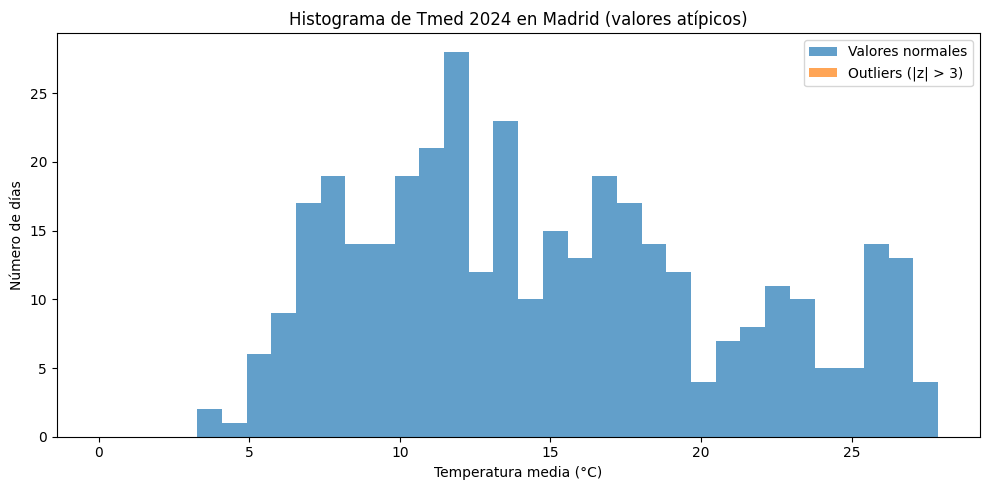

In [15]:
# 4) DETECCI√ìN DE VALORES AT√çPICOS: HISTOGRAMA DE Tmed 2024 EN MADRID

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Asumimos que ‚Äúestad_2024‚Äù viene de agrupar por fecha y calcular mean, median, min, max
# y que su columna de medias diarias se llama 'mean'.

# Filtramos solo las medias diarias de 2024 en Madrid
datos_2024 = estad_2024['mean'].dropna()

# Calculamos el z-score para cada valor
puntuaciones = np.abs(stats.zscore(datos_2024))

# Definimos como outliers los d√≠as con z-score > 3
umbral = 3
fuera = datos_2024[puntuaciones > umbral]
dentro = datos_2024[puntuaciones <= umbral]

# histograma con barras para normales y outliers
plt.figure(figsize=(10, 5))
plt.hist(dentro, bins=30, alpha=0.7, label='Valores normales')
plt.hist(fuera,  bins=30, alpha=0.7, label='Outliers (|z| > 3)')

plt.title('Histograma de Tmed 2024 en Madrid (valores at√≠picos)')
plt.xlabel('Temperatura media (¬∞C)')
plt.ylabel('N√∫mero de d√≠as')
plt.legend()
plt.tight_layout()
plt.show()



¬øQu√© significa un outlier en este histograma?
Un outlier aqu√≠ es un d√≠a cuya temperatura media est√° tan lejos de la media anual de 2024 en Madrid que su z‚Äêscore supera ¬±3 (m√°s de tres desviaciones est√°ndar). En la pr√°ctica:

Outlier fr√≠o: un d√≠a con tmed cercana a 3 ¬∞C‚Äì4 ¬∞C (algo muy inusual en invierno).

Outlier c√°lido: un d√≠a con tmed en torno a 27 ¬∞C‚Äì28 ¬∞C (solo unos pocos d√≠as de calor extremo en agosto).

Conclusiones:

La gran mayor√≠a de los d√≠as de 2024 (barras azules) se movi√≥ entre 8 ¬∞C y 23 ¬∞C, un rango ‚Äút√≠pico‚Äù para Madrid.

Solo unos pocos d√≠as (barras naranjas) quedaron fuera de ese rango:

En invierno, d√≠as con tmed casi 3‚Äì4 ¬∞C.

En pleno agosto, d√≠as con tmed cerca de 27‚Äì28 ¬∞C.

El pico de frecuencia (la barra m√°s alta) est√° alrededor de 11‚Äì12 ¬∞C, caracter√≠stico de primavera u oto√±o, cuando la temperatura es m√°s estable.

En resumen, este histograma muestra que en 2024 solo unos d√≠as fueron realmente muy fr√≠os (‚âà 3 ¬∞C de tmed) o muy calurosos (‚âà 27 ¬∞C), y el resto del a√±o la tmed diaria se mantuvo entre 8 ¬∞C y 23 ¬∞C.

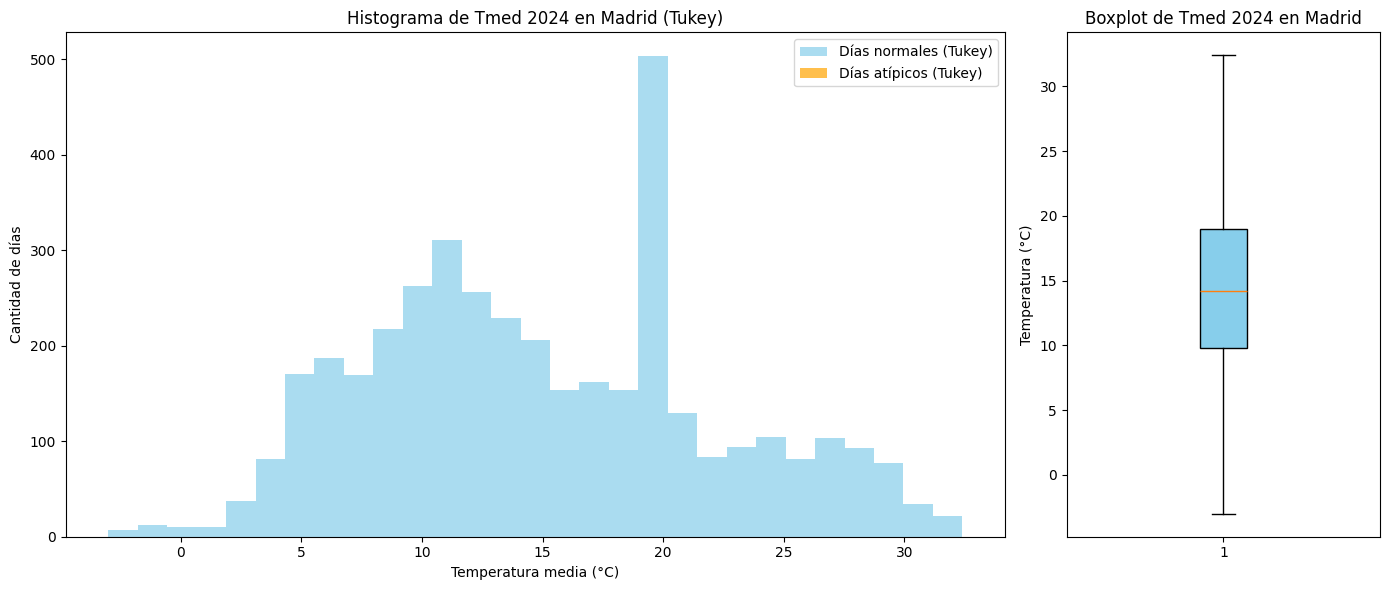

In [10]:
# 4) DETECTAMOS VALORES AT√çPICOS CON TUKEY Y HACEMOS HISTOGRAMA + BOXPLOT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) FILTRAMOS SOLO MADRID 2024
df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df['provincia'] = df['provincia'].str.strip().str.title()
df_madrid_2024 = df[(df['provincia'] == 'Madrid') & (df['fecha'].dt.year == 2024)]
datos_2024 = df_madrid_2024['tmed'].dropna()

# 2) CALCULAMOS LOS CUARTILES Y EL IQR PARA TUKEY
q1 = datos_2024.quantile(0.25)
q3 = datos_2024.quantile(0.75)
iqr = q3 - q1
limite_bajo = q1 - 1.5 * iqr
limite_alto = q3 + 1.5 * iqr

# SEPARAMOS D√çAS "NORMALES" DE D√çAS AT√çPICOS (outliers)
normales = datos_2024[(datos_2024 >= limite_bajo) & (datos_2024 <= limite_alto)]
atipicos = datos_2024[(datos_2024 < limite_bajo) | (datos_2024 > limite_alto)]

# 3) DEFINIMOS LOS INTERVALOS (BINS) PARA EL HISTOGRAMA
puntos = np.linspace(datos_2024.min(), datos_2024.max(), 30)

# 4) CREAMOS LA FIGURA CON DOS GR√ÅFICOS: HISTOGRAMA Y BOXPLOT
fig, (ax_histo, ax_caja) = plt.subplots(
    1, 2, figsize=(14, 6),
    gridspec_kw={'width_ratios': [3, 1]}
)

# HISTOGRAMA
ax_histo.hist(normales, bins=puntos, alpha=0.7, label='D√≠as normales (Tukey)', color='skyblue')
ax_histo.hist(atipicos, bins=puntos, alpha=0.7, label='D√≠as at√≠picos (Tukey)', color='orange')
ax_histo.set_title('Histograma de Tmed 2024 en Madrid (Tukey)')
ax_histo.set_xlabel('Temperatura media (¬∞C)')
ax_histo.set_ylabel('Cantidad de d√≠as')
ax_histo.legend()

# DIAGRAMA DE CAJA
ax_caja.boxplot(
    datos_2024,
    vert=True,
    showfliers=True,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='black'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, alpha=0.7)
)
ax_caja.set_title('Boxplot de Tmed 2024 en Madrid')
ax_caja.set_ylabel('Temperatura (¬∞C)')

plt.tight_layout()
plt.show()


1. Histograma TMed 2024 en Madrid (Tukey‚Äôs Fences)

Cuenta cu√°ntos d√≠as tuvieron cada temperatura media en 2024 y se√±ala en naranja los pocos d√≠as ‚Äúat√≠picos‚Äù seg√∫n Tukey (por debajo de 
ùëÑ
1
‚àí
1.5
‚Äâ
IQR
Q1‚àí1.5IQR o por encima de 
ùëÑ
3
+
1.5
‚Äâ
IQR
Q3+1.5IQR).

Explicaci√≥n:

La mayor√≠a de los d√≠as (barras azules) se agrupa entre 5 ¬∞C y 25 ¬∞C.

El pico m√°s alto (~11‚Äì12 ¬∞C) corresponde a muchos d√≠as de primavera/oto√±o.

Solo unos poqu√≠simos d√≠as quedaron fuera de ese rango:

Muy fr√≠os (<‚âà 4 ¬∞C) en pleno invierno.

Muy calurosos (>‚âà 27 ¬∞C) en verano.


En 2024 casi todos los d√≠as en Madrid rondaron entre 5 ¬∞C y 25 ¬∞C de media. Solo unos pocos (barras naranjas) fueron realmente extremos: d√≠as invernales con tmed ‚âà 3 ¬∞C y d√≠as veraniegos con tmed ‚âà 28‚Äì32 ¬∞C.

2. Boxplot de TMed 2024 en Madrid

Resume en una sola caja toda la distribuci√≥n de tmed diarias:

Caja (Q1‚ÄìQ3): 50 % de los d√≠as estuvo entre ~10 ¬∞C (Q1) y ~19 ¬∞C (Q3).

L√≠nea interna (mediana): el valor intermedio, alrededor de ~14‚Äì15 ¬∞C.

Bigotes: extienden hasta el m√≠nimo y m√°ximo ‚Äúnormales‚Äù (3 ¬∞C a 26 ¬∞C) antes de que un d√≠a sea ‚Äúat√≠pico‚Äù.

Puntos fuera de los bigotes: los outliers de Tukey:

D√≠as con tmed <‚âà 3 ¬∞C (pocos d√≠as muy fr√≠os).

D√≠as con tmed >‚âà 26 ¬∞C (pocos d√≠as muy calurosos).

El 50 % de los d√≠as de 2024 en Madrid tuvo tmed entre 10 ¬∞C y 19 ¬∞C (mediana ~14 ¬∞C). Lo normal oscil√≥ entre 3 ¬∞C (m√≠nimo) y 26 ¬∞C (m√°ximo). Solo unos pocos d√≠as se salieron de esos l√≠mites y quedan como puntos aislados.

Conclusi√≥n (histograma + boxplot):

Ambos gr√°ficos coinciden en mostrar que durante 2024 la mayor parte del tiempo Madrid fue templado (tmed entre 10 ¬∞C y 19 ¬∞C).

De los ~365 d√≠as, solo unos pocos fueron realmente extremos (muy fr√≠os en invierno o muy c√°lidos en pleno agosto).

El histograma explica cu√°ntos d√≠as hubo a cada temperatura y marca en naranja los extremos.

El boxplot condensa esa misma informaci√≥n en cuartiles y se√±ala los mismos d√≠as fuera de rango como ‚Äúoutliers‚Äù.

/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_53309/4060687424.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(valores_por_mes, labels=list(range(1, 13)), showfliers=True)


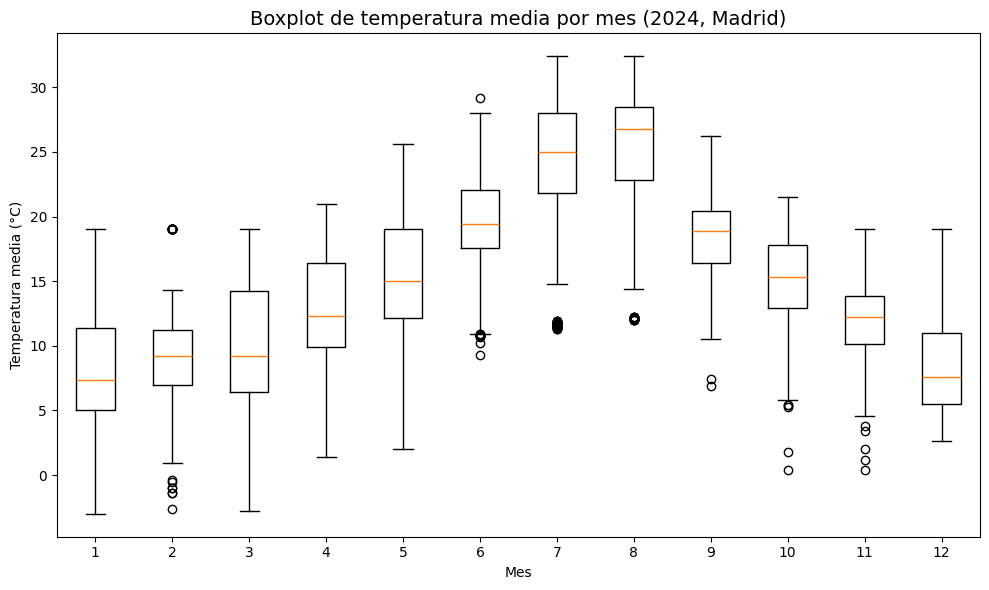

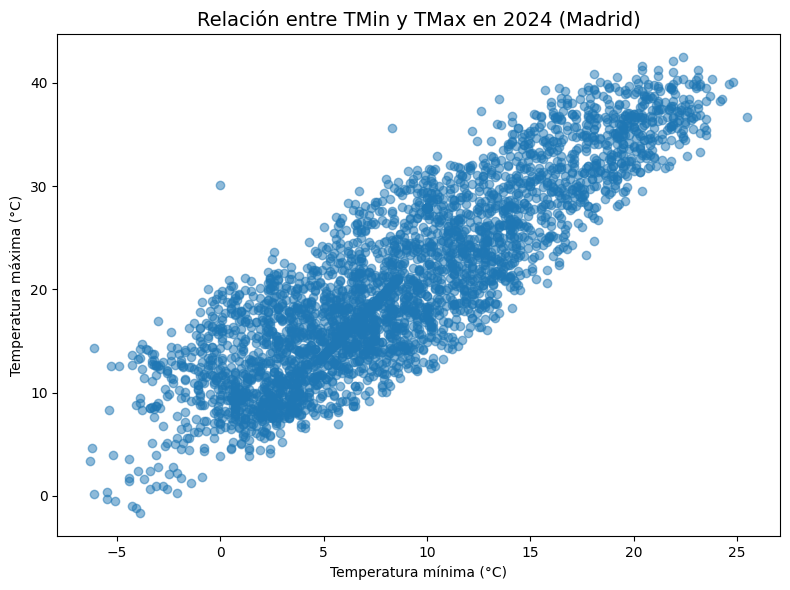

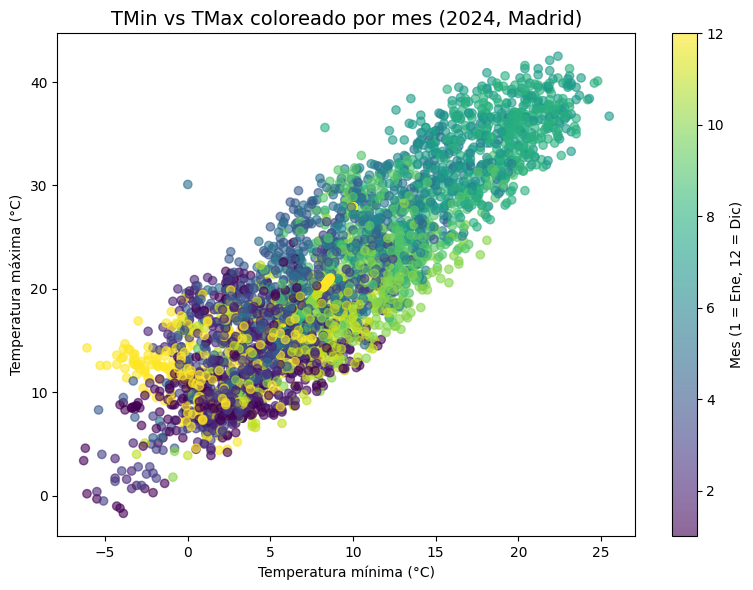

In [11]:
# 5) GR√ÅFICOS ADICIONALES
#    1¬∫ Boxplot mensual de temperatura media (2024, Madrid)
#    2¬∫ Diagrama de dispersi√≥n TMin vs TMax (2024, Madrid)

import pandas as pd
import matplotlib.pyplot as plt

# Filtramos solo Madrid en 2024
df_madrid_2024 = df[(df['provincia'] == 'Madrid') & (df['fecha'].dt.year == 2024)].copy()

# 1¬∫ Boxplot mensual de tmed en 2024 para Madrid
# Agregamos la columna 'mes'
df_madrid_2024['mes'] = df_madrid_2024['fecha'].dt.month

plt.figure(figsize=(10, 6))
# lista de 12 series, una por cada mes
valores_por_mes = [
    df_madrid_2024[df_madrid_2024['mes'] == m]['tmed'].dropna()
    for m in range(1, 13)
]
# boxplot con etiquetas de 1 a 12
plt.boxplot(valores_por_mes, labels=list(range(1, 13)), showfliers=True)
plt.title('Boxplot de temperatura media por mes (2024, Madrid)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Temperatura media (¬∞C)')
plt.tight_layout()
plt.show()

# 2¬∫ Diagrama de dispersi√≥n TMin vs TMax en 2024 para Madrid
plt.figure(figsize=(8, 6))
plt.scatter(df_madrid_2024['tmin'], df_madrid_2024['tmax'], alpha=0.5)
plt.title('Relaci√≥n entre TMin y TMax en 2024 (Madrid)', fontsize=14)
plt.xlabel('Temperatura m√≠nima (¬∞C)')
plt.ylabel('Temperatura m√°xima (¬∞C)')
plt.tight_layout()
plt.show()

# Agrego color seg√∫n el mes
meses = df_madrid_2024['fecha'].dt.month
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_madrid_2024['tmin'], df_madrid_2024['tmax'],
    c=meses, cmap='viridis', alpha=0.6
)
plt.colorbar(scatter, label='Mes (1 = Ene, 12 = Dic)')
plt.title('TMin vs TMax coloreado por mes (2024, Madrid)', fontsize=14)
plt.xlabel('Temperatura m√≠nima (¬∞C)')
plt.ylabel('Temperatura m√°xima (¬∞C)')
plt.tight_layout()
plt.show()


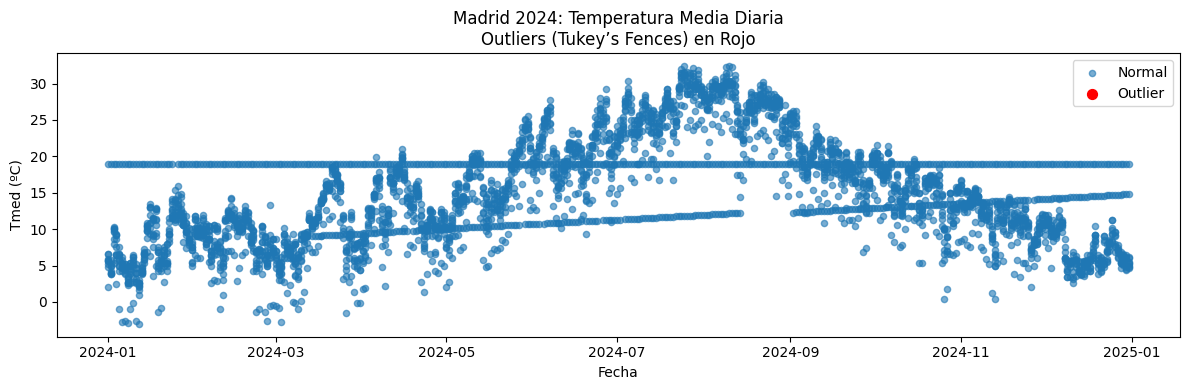

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1) Cargamos y filtramos
df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df = df[df['provincia']=='Madrid']
df2024 = df[df['fecha'].dt.year==2024].copy()

# 2) Detectamos outliers con Tukey‚Äôs Fences
t = df2024['tmed']
q1, q3 = t.quantile([0.25, 0.75])
iqr = q3 - q1
lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
df2024['es_outlier'] = (t < lim_inf) | (t > lim_sup)

# 3) Scatter temporal con colores
plt.figure(figsize=(12,4))
plt.scatter(df2024['fecha'][~df2024['es_outlier']],
            df2024['tmed'][~df2024['es_outlier']],
            s=20, alpha=0.6, label='Normal')
plt.scatter(df2024['fecha'][ df2024['es_outlier']],
            df2024['tmed'][ df2024['es_outlier']],
            s=50, color='red', label='Outlier')
plt.title('Madrid 2024: Temperatura Media Diaria\nOutliers (Tukey‚Äôs Fences) en Rojo')
plt.xlabel('Fecha')
plt.ylabel('Tmed (¬∫C)')
plt.legend()
plt.tight_layout()
plt.show()


Boxplot de Temperatura Media por Mes 2024 en Madrid


Para cada mes (1 = enero, ‚Ä¶, 12 = diciembre) aparece c√≥mo se distribuyeron las tmed diarias:

Caja (Q1‚ÄìQ3): 50 % de los d√≠as del mes estuvieron entre esos valores.

L√≠nea gruesa: mediana (valor central).

Bigotes: extienden hasta el valor m√°s alto y m√°s bajo ‚Äúnormal‚Äù (sin contar outliers).

Puntos sueltos: d√≠as at√≠picos, muy fr√≠os o muy calurosos para ese mes.

Enero: mediana ~7 ¬∞C, rango ‚Äúnormal‚Äù entre 5 ¬∞C y 11 ¬∞C. Aparecen algunos outliers por debajo de ‚Äì 3 ¬∞C (d√≠as muy fr√≠os) y por encima de 19 ¬∞C (d√≠as excepcionalmente c√°lidos).

Febrero‚ÄìMarzo: medianas cerca de 9 ¬∞C; rangos normales de unos 7‚Äì11 ¬∞C (febrero) y 6‚Äì14 ¬∞C (marzo). Vuelven a aparecer m√≠nimas de ‚Äì 3 ¬∞C y m√°ximas en torno a 19 ¬∞C como outliers.

Abril‚ÄìMayo: medianas suben a ~12 ¬∞C (abril) y ~15 ¬∞C (mayo). Rango intercuart√≠lico crece a ~10‚Äì16 ¬∞C (abril) y ~12‚Äì19 ¬∞C (mayo).

Junio‚ÄìAgosto (verano):

Junio: mediana ~19 ¬∞C (rango 17‚Äì22 ¬∞C).

Julio: mediana ~25 ¬∞C (rango 22‚Äì28 ¬∞C).

Agosto: mediana ~27 ¬∞C (rango 23‚Äì28 ¬∞C).

Casi no hay outliers en julio-agosto porque casi todos los d√≠as de verano quedaron dentro del rango.

Septiembre‚ÄìNoviembre (oto√±o):

Septiembre: mediana ~19 ¬∞C (rango 15‚Äì28 ¬∞C).

Octubre: mediana ~19 ¬∞C (rango 16‚Äì21 ¬∞C).

Noviembre: mediana ~12 ¬∞C (rango 7‚Äì15 ¬∞C), con outliers fr√≠os (<2 ¬∞C) y algunos aislados c√°lidos (~19 ¬∞C).

Diciembre: mediana ~7 ¬∞C (rango 5‚Äì11 ¬∞C), con outliers de m√≠nimas cerca de ‚Äì 2 ¬∞C y ocasional ‚Äúd√≠a templado‚Äù ~19 ¬∞C.


En enero la tmed est√° cerca de 7 ¬∞C y sube mes a mes hasta tocar los 27 ¬∞C de mediana en agosto. Luego baja de nuevo a ~7 ¬∞C en diciembre. Cada mes tiene su ‚Äòcaja‚Äô (Q1‚ÄìQ3) que muestra el rango donde cay√≥ la mitad de los d√≠as, y los puntos fuera de la caja son los d√≠as muy fr√≠os (en invierno) o muy calientes (en pleno verano).

Diagrama de Dispersi√≥n TMin vs TM√°x 2024 en Madrid (sin colores)

Qu√© muestra:
Cada punto es un d√≠a de 2024 en Madrid, con la temperatura m√≠nima en el eje X y la m√°xima en el eje Y.

Se ve una nube ascendente: cuando la m√≠nima sube, la m√°xima tambi√©n sube.

Ning√∫n punto est√° por debajo de la l√≠nea imaginaria ‚Äúm√°xima = m√≠nima‚Äù, porque siempre la m√°xima de un d√≠a es mayor o igual que la m√≠nima.

En la esquina inferior izquierda (por ejemplo, tmin ‚âà ‚Äì5 ¬∞C y tmax ‚âà 14 ¬∞C) aparecen d√≠as muy fr√≠os en la madrugada pero que luego subieron a temperaturas suaves.

En la esquina superior derecha (por ejemplo, tmin ‚âà 22 ¬∞C y tmax ‚âà 42 ¬∞C) hay d√≠as con madrugadas templadas y fuertes picos de calor por la tarde.

Este gr√°fico confirma que la temperatura m√°xima diaria siempre est√° por encima de la m√≠nima y que ambas guardan una relaci√≥n casi lineal: si la m√≠nima es baja, la m√°xima tambi√©n suele ser baja, y si la m√≠nima es alta, la m√°xima tambi√©n lo ser√°. Los puntos extremos muestran d√≠as con oscilaciones muy grandes (‚Äì5 ¬∞C a 14 ¬∞C) o muy peque√±as (18 ¬∞C a 19 ¬∞C).

Diagrama de Dispersi√≥n TMin vs TM√°x (coloreado por mes) ‚Äì Madrid 2024

Es el mismo ‚Äúm√≠nima vs m√°xima diaria‚Äù de antes, pero ahora cada punto lleva un color distinto seg√∫n el mes (de enero a diciembre). La barra de la derecha indica que:

1 (enero) est√° en p√∫rpura/azul oscuro,

5 (mayo) en verde claro,

12 (diciembre) en amarillo,
y as√≠ sucesivamente.

Puntos azul oscuro/p√∫rpura (enero-febrero):

Aparecen en la esquina inferior izquierda.

M√≠nimas cerca de ‚Äì2 ¬∞C a 5 ¬∞C y m√°ximas solo hasta ~10‚Äì15 ¬∞C.

Muestran d√≠as de invierno muy fr√≠os.

Puntos verde-azulados (primavera; marzo-abril-mayo-junio):

Se desplazan a la zona central de la nube.

M√≠nimas rondan 5‚Äì15 ¬∞C y m√°ximas 15‚Äì30 ¬∞C.

Corresponden a meses templados.

Puntos verdes/amarillo claro (verano; julio-agosto):

Se concentran en la parte alta-derecha.

M√≠nimas de ~18‚Äì22 ¬∞C y m√°ximas de ~32‚Äì38 ¬∞C.

Indican d√≠as de calor fuerte.

Puntos verde-claros/amarillo (oto√±o; sept-oct-nov):

Est√°n de vuelta hacia la zona media.

M√≠nimas van bajando a 10‚Äì15 ¬∞C y m√°ximas entre 15‚Äì28 ¬∞C.

Muestran d√≠as templados a frescos.

Puntos amarillo (diciembre):

Vuelven a la esquina inferior izquierda, similares a enero, con m√≠nimas cercanas a 0‚Äì5 ¬∞C y m√°ximas de 8‚Äì15 ¬∞C.

Al ver los puntos coloreados, se aprecia que los meses m√°s fr√≠os (enero/febrero) est√°n abajo a la izquierda (tmin ~‚Äì2 a 5 ¬∞C, tmax ~0 a 15 ¬∞C), mientras que los meses de julio y agosto aparecen arriba a la derecha (tmin ~18‚Äì22 ¬∞C, tmax ~32‚Äì38 ¬∞C). Primavera y oto√±o ocupan el centro del gr√°fico, con temperaturas intermedias. En resumen, el color confirma visualmente la temporada del a√±o y c√≥mo m√≠nimas y m√°ximas diarias suben y bajan de acuerdo con el mes.

Resumen final para cada gr√°fico
Boxplot mensual:

Cada caja es un mes de 2024. Muestra c√≥mo vari√≥ la temperatura media d√≠a a d√≠a dentro de ese mes. En verano las medianas andan por 25‚Äì27 ¬∞C y no hay outliers; en invierno las medianas rondan 6‚Äì7 ¬∞C y s√≠ hay puntitos por debajo de 0 ¬∞C (d√≠as especialmente fr√≠os).

Scatter simple Tmin vs Tmax:

Muestra la fuerte relaci√≥n entre la m√≠nima y la m√°xima diaria: siempre la m√°xima est√° por encima de la m√≠nima. Los puntos dispersos en la esquina inferior izquierda (m√≠nima muy baja, m√°xima moderada) y en la esquina superior derecha (m√≠nima alta, m√°xima muy alta) ilustran extremos de fr√≠o y calor.

Scatter coloreado por mes:

Lo mismo que el scatter anterior, pero cada punto tiene un color seg√∫n el mes: azul para invierno, verde para primavera, amarillo para verano, etc. As√≠ identificamos de inmediato que enero y febrero agrupan valores bajos, y julio-agosto valores altos.

ADICIONAL

Propuesta gr√°fico adicionale:
Anomal√≠as Estacionales de T¬™ Media (verano 2024 vs verano 2023)
Qu√© muestra: Un choropleth (o un barplot) con la diferencia de temperatura media tomada por provincia entre dos per√≠odos equivalentes.

Verano 2024 (junio‚Äìjulio‚Äìagosto), menos

Verano 2023 (junio‚Äìjulio‚Äìagosto)

Esta gr√°fica permitir√° ver qu√© provincias se desviaron m√°s de su temperatura normal (uso 2023 como referencia) y cu√°les se comportaron muy an√≥malas (m√°s c√°lidas o m√°s frescas).

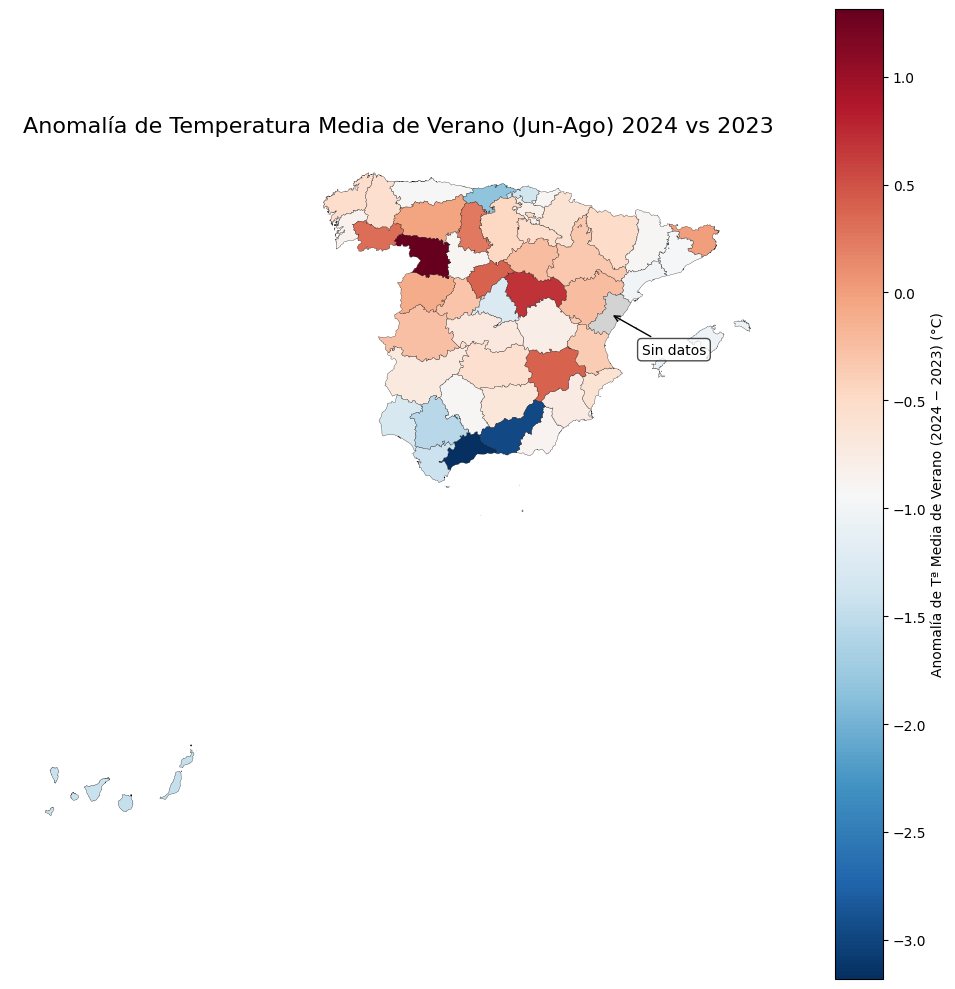

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Cargamos datos de temperaturas limpias y normalizamos provincias
df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df['provincia'] = df['provincia'].str.strip().str.title()

# Funci√≥n para filtrar por a√±o y meses
def filtrar_por_fecha(df, anio, meses):
    return df[(df['fecha'].dt.year == anio) & (df['fecha'].dt.month.isin(meses))]

# Obtenemos datos de verano (junio, julio, agosto) para 2023 y 2024
meses_verano = [6, 7, 8]
verano_2023 = filtrar_por_fecha(df, 2023, meses_verano)
verano_2024 = filtrar_por_fecha(df, 2024, meses_verano)

# Calculamos temperatura media de verano por provincia en 2023 y 2024
tmed_verano_2023 = (
    verano_2023
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
    .rename(columns={'tmed': 'tmed_verano_2023'})
)

tmed_verano_2024 = (
    verano_2024
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
    .rename(columns={'tmed': 'tmed_verano_2024'})
)

# Unimos y calculamos anomal√≠a (2024 ‚Äì 2023)
df_anomalia = tmed_verano_2023.merge(tmed_verano_2024, on='provincia', how='inner')
df_anomalia['anomalia'] = df_anomalia['tmed_verano_2024'] - df_anomalia['tmed_verano_2023']

# Cargamos GeoJSON de provincias y normalizamos nombres
gdf_provincias = gpd.read_file('../data/spain-provinces.geojson')
gdf_provincias['provincia'] = gdf_provincias['name'].str.strip().str.title()

# Hacemos merge geogr√°fico para asignar anomal√≠as; quedar√°n NaN donde no hay datos
gdf_anom = gdf_provincias.merge(df_anomalia[['provincia', 'anomalia']], on='provincia', how='left')

# Dibujamos el mapa, pintando en gris (‚Äúlightgrey‚Äù) las provincias sin datos
fig, ax = plt.subplots(figsize=(10, 10))
gdf_anom.plot(
    column='anomalia',
    cmap='RdBu_r',
    legend=True,
    edgecolor='black',
    linewidth=0.2,
    ax=ax,
    legend_kwds={
        'label': "Anomal√≠a de T¬™ Media de Verano (2024 ‚àí 2023) (¬∞C)",
        'orientation': "vertical"
    },
    missing_kwds={
        "color": "lightgrey",      # Provincias sin datos van a salir en gris
        "label": "Sin datos"       # Pongo la flechita ‚ÄúSin datos‚Äù a castellon
    } 
)

# A√±adimos t√≠tulo y quitamos ejes
ax.set_title('Anomal√≠a de Temperatura Media de Verano (Jun-Ago) 2024 vs 2023', fontsize=16)
ax.axis('off')

# Se√±alamos con una flecha una provincia sin datos (por ejemplo, Castell√≥n)
#     Busco el centroid de la geometr√≠a donde 'anomalia' es NaN
sin_datos = gdf_anom[gdf_anom['anomalia'].isna()]
if not sin_datos.empty:
    # Si hay varias, podemos elegir la primera (ej. Castell√≥n)
    fila = sin_datos.iloc[0]
    centroide = fila.geometry.centroid
    # Agregamos la anotaci√≥n
    ax.annotate(
        "Sin datos",
        xy=(centroide.x, centroide.y),
        xytext=(centroide.x + 1.0, centroide.y - 1.0),
        arrowprops=dict(arrowstyle="->", color="black"),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7)
    )

plt.tight_layout()
plt.show()


Este mapa muestra la diferencia (anomal√≠a) entre la temperatura media del verano (junio‚Äìagosto) de 2024 comparada con la de 2023, provincia a provincia. En otras palabras, para cada provincia restamos la media de tmed del verano de 2023 a la media del verano de 2024. El resultado (en grados Celsius) se colorea seg√∫n la paleta:

En rojo, por ejemplo, aparecen las provincias donde el verano 2024 fue m√°s caluroso que en 2023 (a mayor intensidad de rojo, mayor el aumento).

En azul aparecen las provincias donde el verano 2024 fue m√°s fresco que en 2023 (a mayor intensidad de azul, mayor la ca√≠da).

Por ejemplo, Granada est√° en azul oscuro porque su media veraniega baj√≥ casi 3¬∞C, mientras que Salamanca destaca en rojo intenso porque subi√≥ unos 2 ¬∞C respecto al a√±o anterior. Provincias casi blancas tuvieron veranos muy parecidos en ambos a√±os.